**GOAL**
    1. 처리 결과를 분류하여 여러 창에 체계적으로 출력할 수 있음
    2. matplotlib과 seaborn, DataFrame을 이용한 시각화 기법의 기초를 이해함
    3. 기본적이고 중요한 그래프의 종류와 사용 목적을 이해하고 생성할 수 있음
    4. 시각화 결과를 GUI에 연동 출력 할 수 있음
**Contents**
    1. DataFrame, matplotlib, seaborn의 plotting 기법
    2. histogram, scattrer, boxplot 등 주요 그래프 plotting 하기
    3. backend모듈과 연동하여 GUI 창에 출력하기

### 여러 창에 DataFrame 출력하기

- parameter로 창을 넘겨받아 출력함
    - def display_title(d_frame)
    - def display_pandas(d_frame)
- 나아가 윈도우 창까지 넘겨받아, 넘겨받은 창에 DataFrame에 연동하여 출력하는 방법이 있음
    - def display_title(wnd, d_frame)
    - def display_pandas(wnd, d_frame)

#### df.describe() 메서드

In [ ]:
win2 = tk.Tk()
win2.title('기초통계 요약')
df2 = df.describe()
display_title(win2, df2)
display_pandas(win2, df2)

In [17]:
import pandas as pd
import tkinter as tk
import seaborn as sns

def read_data():
    global data, df, pd
    df = pd.read_csv('tips.csv')
    df = df.apply(pd.to_numeric, errors='ignore')

def display_title(wnd, d_frame):
    title = list(d_frame.columns)
    e = tk.Entry(wnd, text=' ', width=10, bg='gray', fg='white')
    for i in range(len(title)):
        e = tk.Entry(wnd, width=10, bg='gray', fg='white')
        e.insert(0, title[i])
        e.grid(row = 0, column = i+1) 

def display_pandas(wnd, d_frame):
    rows, cols = d_frame.shape
     
    for r in range(rows):
        e = tk.Entry(wnd, bg='gray',fg='white', width=10)
        e.insert(0, d_frame.index[r])
        e.grid(row = r+1, column = 0)

        for c in range(cols):
            e = tk.Entry(wnd, width=10)
            e.insert(0, d_frame.iloc[r,c])
            e.grid(row = r+1, column = c+1)

win = tk.Tk()

read_data()
win.title('처리결과')
display_title(win,df)
display_pandas(win, df)

win2= tk.Tk()
win2.title('기초통계 요약')
df2=df.describe()
display_title(win2, df)
display_pandas(win2, df)

win3= tk.Tk()
win3.title('소숫점 자릿수 조정')
df3=df2.round(2)
display_title(win3, df3)
display_pandas(win3, df3)

win5= tk.Tk()
win5.title('팁 6$ 이상 고객')
df5=df[df.tip>=6]
display_title(win5, df5)
display_pandas(win5, df5)

win.mainloop()

### 시각화

- 그래프 종류
    - 막대그래프: 상대 비교
        - df2 = df.head(10)
        - plt.bar(df2.index, df2['tip'])
    - 히스토그램: 데이터 분포
        - plt.hist(df['tip'])
    - 산점도: 두 변수간 관계
        - plt.scatter(x = 'total_bill', y = 'tip', data = df)
    - 박스플롯: 범주형 데이터 분포 표현
        - plt.boxplot(df['tip'])
    - 커널밀도추정차트(kde): 데이터 분포와 밀도
        - sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'kde')

- 시각화 방법은 다음과 같음
    - DataFrame 객체 활용
    - matplotlib 모듈 활용
    - seaborn 모듈 활용

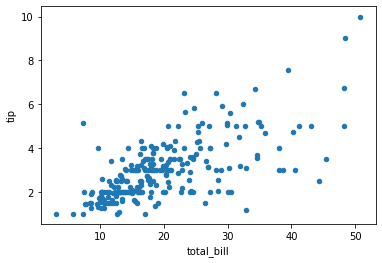

In [18]:
#아래 세 방법이 모두 같은 그래프를 plot 함
#DataFrame
df.plot(x = 'total_bill', y = 'tip', kind = 'scatter')

In [ ]:
#matplotlib
import matplotlib.pyplot as plt
plt.scatter(x = 'total_bill', y = 'tip', data = df)

In [ ]:
#seaborn
import seaborn as sns
sns.scatterplot(x = 'total_bill', y = 'tip', data = df)

- 시각화 작업 순서는 다음과 같음
    - import
    - data 준비
    - 스타일 지정, 제목, 레이블 등 모양 갖추기 (option)
    - 그리기
    - 보여주기

- 모양 갖추기 메서드
    - 그래프 제목: plt.title('graph title')
    - y축 설명: plt.ylabel('y축 값 설명')
    - x축 설명: plt.xlabel('x축 값 설명')
    - 범례: plt.legend(loc = '위치')
    - x축 최대 최소값 지정: plt.xlim(x축 최소, x축 최대)
    - y축 최대 최소값 지정: plt.ylim(y축 최소, y축 최대)

In [2]:
#실습1 파일 읽어오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('tips.csv')   

%matplotlib inline

Text(0, 0.5, 'number')

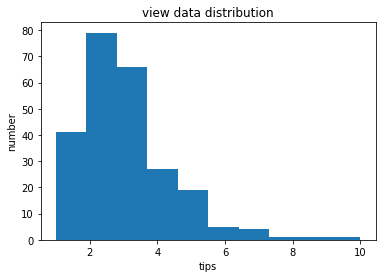

In [3]:
plt.hist(df['tip'])                         #df['tip'].hist()
plt.title('view data distribution')
plt.xlabel('tips')
plt.ylabel('number')

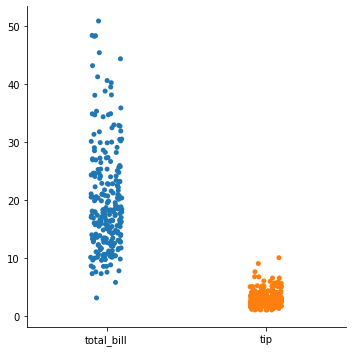

In [4]:
sns.catplot(data=df[['total_bill','tip']])

Text(0.5, 1.0, 'Tip By Member')

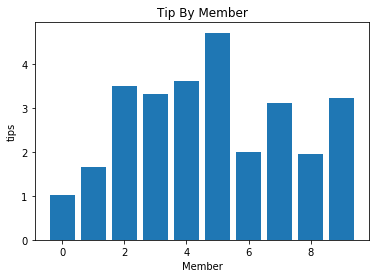

In [5]:
df2=df.head(10)
plt.bar(df2.index, df2.tip)       #df2.plot(kind='bar')....'bar'  box, kde, pie, scatter, area...etc
plt.ylabel('tips')
plt.xlabel('Member')
plt.title('Tip By Member')

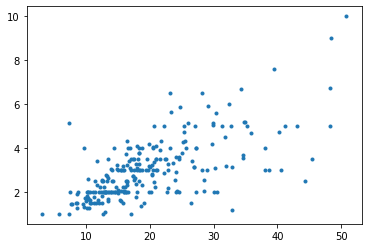

In [6]:
plt.scatter(x='total_bill', y='tip', marker='.',data=df )      #df.plot('total_bill', 'tip', kind='scatter')

Text(0.5, 1.0, 'view for tips by sex')

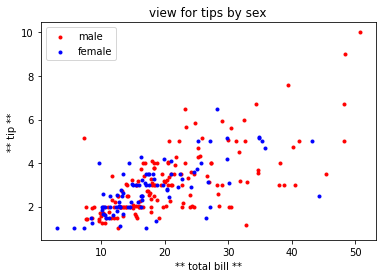

In [7]:
#실습2 성별을 척도로 분석
d1=df[df.sex=='Male']
d2=df[df.sex=='Female']

plt.scatter(x='total_bill', y='tip',c='r',marker='.', data=d1, label='male')
plt.scatter(x='total_bill', y='tip',c='b', marker='.',data=d2,label='female')

plt.xlabel('** total bill **')
plt.ylabel('** tip **')
plt.legend()
plt.title('view for tips by sex')

In [8]:
d1.describe()

,Unnamed: 0,total_bill,tip,size
count,157.000000,157.000000,157.000000,157.000000
mean,117.853503,20.744076,3.089618,2.630573
std,73.208853,9.246469,1.489102,0.955997
min,1.000000,7.250000,1.000000,1.000000
25%,53.000000,14.000000,2.000000,2.000000
50%,110.000000,18.350000,3.000000,2.000000
75%,182.000000,24.710000,3.760000,3.000000
max,242.000000,50.810000,10.000000,6.000000


In [9]:
d2.describe()

,Unnamed: 0,total_bill,tip,size
count,87.000000,87.000000,87.000000,87.000000
mean,128.080460,18.056897,2.833448,2.459770
std,65.468121,8.009209,1.159495,0.937644
min,0.000000,3.070000,1.000000,1.000000
25%,83.500000,12.750000,2.000000,2.000000
50%,131.000000,16.400000,2.750000,2.000000
75%,182.000000,21.520000,3.500000,3.000000
max,243.000000,44.300000,6.500000,6.000000


Text(0.5, 1.0, 'view for tips by sex')

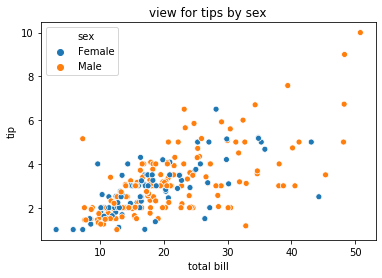

In [10]:
#seaborn
sns.scatterplot(x='total_bill', y='tip', data=df, hue='sex') #hue 설정

plt.xlabel('total bill')
plt.ylabel('tip')
plt.title('view for tips by sex')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2248dd30>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2246ec88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2248dbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2249bda0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2249be80>],
 'means': []}

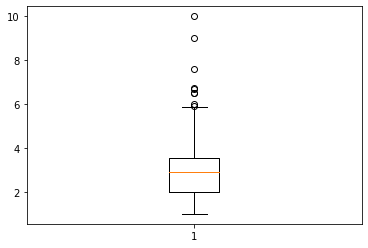

In [11]:
#boxplot
plt.boxplot(df['tip'])            #df.plot(kind='box')

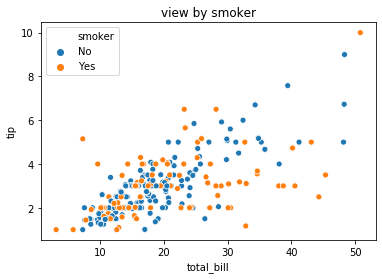

In [12]:
#실습3 흡연 여부를 척도로 분석
sns.scatterplot(x='total_bill', y='tip', data=df, hue='smoker') #hue 설정
plt.title('view by smoker')
plt.xlabel='bill'
plt.show()

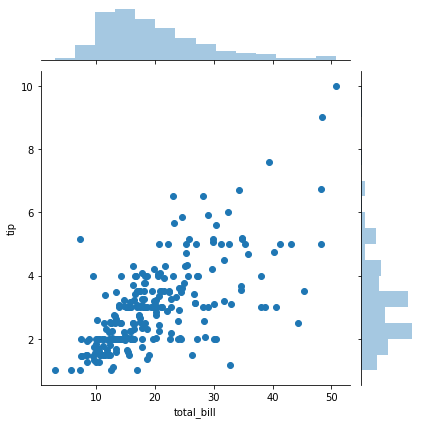

In [13]:
sns.jointplot(x='total_bill', y='tip', data=df)

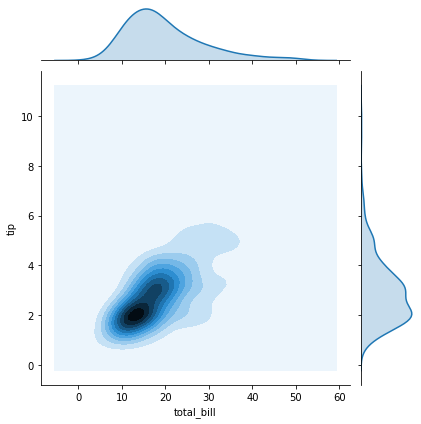

In [14]:
sns.jointplot(x='total_bill', y='tip',data=df, kind='kde')

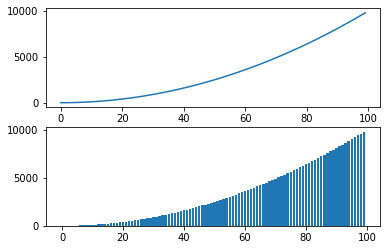

In [15]:
import matplotlib.pyplot as plt2

fig = plt2.figure()                
axx1 = fig.add_subplot(2, 1, 1) #axes 구성: 두행 한 열 구성, 첫번째
axx2 = fig.add_subplot(2, 1, 2) #axes 구성: 두행 한 열 구성, 두번째

x = range(0, 100)
y = [v*v for v in x]
axx1.plot(x, y)
axx2.bar(x, y)

plt2.show()

### GUI를 창에 연동하여 출력

- 즉 window에 plotting함
- 과정은 다음과 같음
    - 1. import(plot 객체, FigureCanvasTkAgg 객체...)
    - 2. Figure 객체 생성
    - 3. Figure 기반 subplot 생성(axes)
    - 4. axes에 plotting 하기
    - 5. window 생성
    - 6. canvas 생성
        - FigureCanvasTkAgg(2번의 Figure와 5번 윈도우를 연동하여 생성함)
    - 7. canvas._tkcanvas pack
        - Agg(Anti Grain Geometry): 백그라운드에서 GUI를 rendering 해주는 툴, figure의 픽셀 이미지를 생성함
        - TkAgg: Tk 캔버스에 Agg 를 rendering함

In [16]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg #1
import seaborn as sns
import pandas as pd                                                 
import tkinter as tk

df=pd.read_csv('tips.csv') 
fig =Figure(figsize=(8,6), facecolor='yellow') #2
ax1=fig.add_subplot(211) #3
sns.scatterplot(x='total_bill', y='tip', data=df, hue='sex', ax=ax1) #4

win=tk.Tk() #5
canvas=FigureCanvasTkAgg(master=win, figure=fig) #6
canvas._tkcanvas.pack( ) #7 

win.mainloop()

In [19]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg # 1
import seaborn as sns
import pandas as pd                                      
import tkinter as tk

df=pd.read_csv('tips.csv') 
fig =Figure(figsize=(8,6), facecolor='yellow') #2
ax1=fig.add_subplot(211) #3 
ax1.grid(linestyle='-')
ax1.set_title('view tips by gender')
ax1.set_xlabel('total bill')
ax1.set_facecolor('white')
sns.scatterplot(x='total_bill', y='tip', data=df, hue='sex', ax=ax1) #4

win=tk.Tk() #5
canvas=FigureCanvasTkAgg(master=win, figure=fig) #6
canvas._tkcanvas.pack( ) #7 

win.mainloop()